Ryhmä 15: Ilkka Norokallio, Riku Määttä ja Elina Luumi
Koodasimme yhdessä koko tehtävän teamsin välityksellä. Teimme yhteistyötä koko tehtävänannon ajan, ja jokainen osallistui aktiivisesti. Sen takia meillä kaikilla on samanlaiset tiedostot. Ylläpidimme projektia githubissa.

Tehtävä 3
k-Means algortimin kokeiluja

Valitsimme Kagglesta tällaisen datasetin: https://www.kaggle.com/datasets/kazanova/sentiment140
Lyhensimme datasettiä näihin meidän testailuihin, koska datasettiä oli niin iso. Valitsimme 500 twiittiä datasetistä, joita tässä meidän koodissamme testaamme. Koodissamme löytyvät meidän kaksi käyttötapausta, joista koodasimme myös


In [2]:
# Kirjastot

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.preprocessing import StandardScaler

In [3]:
# Datan lataaminen ja tarkastaminen
df = pd.read_csv('muokattu_twitter_dataset.csv')

df.head()

,ID,Date,Query,Username,Comment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


1. Käyttötapaus:
Analysoidaan negatiivisten, positiivisten ja neutraalien twiittien määrä

In [4]:
# Valitaan tekstidata (Comments-sarake)
comments = df['Comment']

# Muunnetaan tekstidata numeeriseksi TF-IDF-vektorisoinnilla
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(comments)

In [5]:
# Määritetään klusterien määrä (esimerkiksi 3: positiivinen, neutraali, negatiivinen)
k = 3

# K-means-algoritmin soveltaminen
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Lisätään klusteritieto dataan
df['Cluster'] = kmeans.labels_

# Näytetään muutamia rivejä klusteritiedolla
df[['Comment', 'Cluster']].head()



,Comment,Cluster
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,1
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [6]:
# Tarkastellaan, kuinka monta viestiä kuuluu kuhunkin klusteriin
print(df.groupby('Cluster').size())

# Katsotaan esimerkkiviestejä jokaisesta klusterista
for cluster in range(k):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Comment'].head(5).tolist())


Cluster
0    399
1     64
2     36
dtype: int64

Cluster 0:
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", '@Kwesidei not the whole crew ', 'Need a hug ']

Cluster 1:
['my whole body feels itchy and like its on fire ', "@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.", "one of my friend called me, and asked to meet with her at Mid Valley today...but i've no time *sigh* ", "ok I'm sick and spent an hour sitting in the shower cause I was too sick to stand and held back the puke like a champ. BED now ", '@cocomix04 ill tell ya the story later  not a good day and ill be workin for like three more hours...']

Cluster 2:
['this week is not going as i 

In [7]:
# Klustereiden tulkinta esimerkkiviestien perusteella
cluster_names = {
    0: "Negatiivinen",
    1: "Neutraali",
    2: "Positiivinen"
}

# Lisätään klusterin nimi dataan
df['Cluster_Label'] = df['Cluster'].map(cluster_names)

# Näytetään data klusterinimen kanssa
df[['Comment', 'Cluster', 'Cluster_Label']].head()


,Comment,Cluster,Cluster_Label
0,is upset that he can't update his Facebook by ...,0,Negatiivinen
1,@Kenichan I dived many times for the ball. Man...,0,Negatiivinen
2,my whole body feels itchy and like its on fire,1,Neutraali
3,"@nationwideclass no, it's not behaving at all....",0,Negatiivinen
4,@Kwesidei not the whole crew,0,Negatiivinen


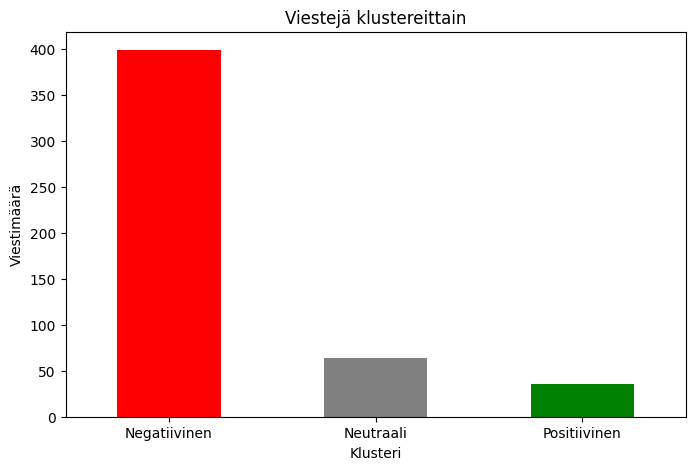

In [8]:
# Visualisoidaan klusterien jakauma
cluster_counts = df['Cluster_Label'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Viestejä klustereittain")
plt.xlabel("Klusteri")
plt.ylabel("Viestimäärä")
plt.xticks(rotation=0)
plt.show()


2. käyttötapaus:
Bottiliikenteen ja epäilyttävän käyttäytymisen tunnistaminen twiiteistä

In [38]:
# Lasketaan tekstin ominaisuuksia jokaiselle viestille
df.loc[:, 'Length'] = df['Comment'].apply(len)  # Merkkien määrä
df.loc[:, 'Word_Count'] = df['Comment'].apply(lambda x: len(x.split()))  # Sanojen määrä
df.loc[:, 'Avg_Word_Length'] = df['Length'] / df['Word_Count']  # Keskimääräinen sanan pituus
df.loc[:, 'Exclamation_Count'] = df['Comment'].str.count(r'!')  # Huutomerkkejä
df.loc[:, 'Dot_Count'] = df['Comment'].str.count(r'\.')  # Pisteitä

# Lasketaan toistuvat sanat
from collections import Counter
def word_repetition(comment):
    words = comment.lower().split()
    word_counts = Counter(words)
    return sum(count - 1 for count in word_counts.values() if count > 1)

df.loc[:, 'Word_Repetition'] = df['Comment'].apply(word_repetition)

# Lasketaan lauseiden määrä (pisteet, huutomerkki, kysymysmerkki)
import re
def sentence_count(comment):
    return len(re.findall(r'[.!?]', comment))

df.loc[:, 'Sentence_Count'] = df['Comment'].apply(sentence_count)

# Lasketaan lauserakenteiden toistuvuus
def sentence_repetition(comment):
    sentences = [s.strip() for s in re.split(r'[.!?]', comment.lower()) if s.strip()]
    sentence_counts = Counter(sentences)
    return sum(count - 1 for count in sentence_counts.values() if count > 1)

df.loc[:, 'Sentence_Repetition'] = df['Comment'].apply(sentence_repetition)

# Normaaliarvoistus (tärkeää k-meansille)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Length', 'Word_Count', 'Avg_Word_Length', 'Exclamation_Count', 'Dot_Count', 'Word_Repetition', 'Sentence_Count', 'Sentence_Repetition']
X_scaled = scaler.fit_transform(df[features])

# K-means-algoritmi (aluksi testataan 3 klusteria)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Bot'] = kmeans.fit_predict(X_scaled)

# Klusterien jakauma
print(df['Cluster_Bot'].value_counts())

# Esimerkkiviestit klustereista
for cluster in range(3):  # Kolme klusteria
    cluster_comments = df[df['Cluster_Bot'] == cluster]['Comment']
    if not cluster_comments.empty:
        print(f"\nCluster {cluster} (Esimerkkiviestit):")
        print(cluster_comments.head(5).tolist())
    else:
        print(f"\nCluster {cluster} ei sisällä viestejä.")



Cluster_Bot
0    252
2    207
1     40
Name: count, dtype: int64

Cluster 0 (Esimerkkiviestit):
['my whole body feels itchy and like its on fire ', '@Kwesidei not the whole crew ', 'Need a hug ', "@Tatiana_K nope they didn't have it ", '@twittera que me muera ? ']

Cluster 1 (Esimerkkiviestit):
['@MissXu sorry! bed time came here (GMT+1)   http://is.gd/fNge', 'Ugh....92 degrees tomorrow ', '@katortiz  Not forever... See you soon!', "Why won't you show my location?!   http://twitpic.com/2y2es", 'Strider is a sick little puppy  http://apps.facebook.com/dogbook/profile/view/5248435']

Cluster 2 (Esimerkkiviestit):
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only

In [39]:
    
# Klusterien tulkinta
cluster_names_bot = {
    0: "Ihmisten viestit",
    1: "Bottiviestit"
}

# Lisätään klusterinimi dataan
df['Cluster_Bot_Label'] = df['Cluster_Bot'].map(cluster_names_bot)

# Näytetään data klusterinimen kanssa
df[['Comment', 'Cluster_Bot', 'Cluster_Bot_Label']].head()

# Klusterikohtainen analyysi ja tyypillisten piirteiden tarkastelu
for cluster in range(2):
    print(f"\nAnalyysi - Cluster {cluster} ({cluster_names_bot[cluster]}):")
    cluster_data = df[df['Cluster_Bot'] == cluster]

    print(f"Klusterin koko: {cluster_data.shape[0]} viestiä")
    
    # Keskiarvot klusterin ominaisuuksista
    avg_features = cluster_data[['Length', 'Word_Count', 'Avg_Word_Length', 'Exclamation_Count', 'Dot_Count']].mean()
    print(f"Keskiarvot ominaisuuksista: \n{avg_features}")
    
    # Esimerkkiviestit
    print(f"\nEsimerkkiviestit ({cluster_names_bot[cluster]}):")
    example_comments = cluster_data['Comment'].head(5).tolist()
    for idx, comment in enumerate(example_comments):
        print(f"Esimerkki {idx+1}: {comment}")



Analyysi - Cluster 0 (Ihmisten viestit):
Klusterin koko: 252 viestiä
Keskiarvot ominaisuuksista: 
Length               51.730159
Word_Count            9.436508
Avg_Word_Length       5.496512
Exclamation_Count     0.281746
Dot_Count             0.587302
dtype: float64

Esimerkkiviestit (Ihmisten viestit):
Esimerkki 1: my whole body feels itchy and like its on fire 
Esimerkki 2: @Kwesidei not the whole crew 
Esimerkki 3: Need a hug 
Esimerkki 4: @Tatiana_K nope they didn't have it 
Esimerkki 5: @twittera que me muera ? 

Analyysi - Cluster 1 (Bottiviestit):
Klusterin koko: 40 viestiä
Keskiarvot ominaisuuksista: 
Length               44.025000
Word_Count            5.650000
Avg_Word_Length       8.708482
Exclamation_Count     1.075000
Dot_Count             2.000000
dtype: float64

Esimerkkiviestit (Bottiviestit):
Esimerkki 1: @MissXu sorry! bed time came here (GMT+1)   http://is.gd/fNge
Esimerkki 2: Ugh....92 degrees tomorrow 
Esimerkki 3: @katortiz  Not forever... See you soon!
Esimerkk

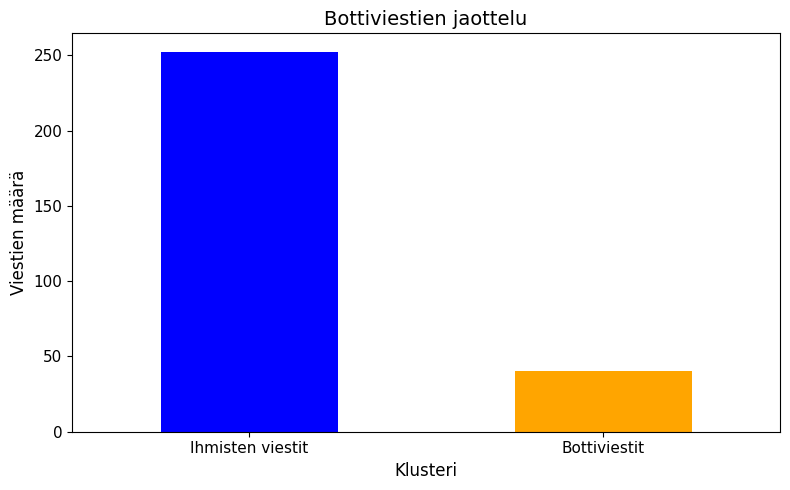

In [40]:
# Klusterien jakauman visualisointi
bot_counts = df['Cluster_Bot_Label'].value_counts()

# Visualisoidaan klusterien jakauma
plt.figure(figsize=(8, 5))

# Värit vain kahdelle klusterille
bot_counts.plot(kind='bar', color=['blue', 'orange'])  # Poistettu sekaryhmä

plt.title("Bottiviestien jaottelu", fontsize=14)
plt.xlabel("Klusteri", fontsize=12)
plt.ylabel("Viestien määrä", fontsize=12)

# Akselin nimet ja värit
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Parannetaan ulkoasua
plt.tight_layout()
plt.show()




In [41]:
# Elbow-menetelmä k-means-klusterien optimaalisen määrän löytämiseksi
from sklearn.metrics import silhouette_score        #Tuodaan silhouette_score-metriikka
# Kokeillaan eri k-arvoja
k_values = range(2, 11)         # Määritetään k-arvojen vaihteluväli 2-10
inertias = []                   # Luodaan tyhjät listat inertioille
silhouette_scores = []          # Luodaan tyhjät listat silhouette-pisteille


In [42]:
# Käydään läpi jokainen k-arvo
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)          #Luodaan KMeans-malli kullekin k:n arvolle
    kmeans.fit(X_scaled)                                    
    inertias.append(kmeans.inertia_)                        #Lasketaan inertia jokaiselle klusterimäärälle
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))        # Lasketaan silhouette-pisteet jokaiselle klusterimäärälle ja tallennetaan tulokset listoihin


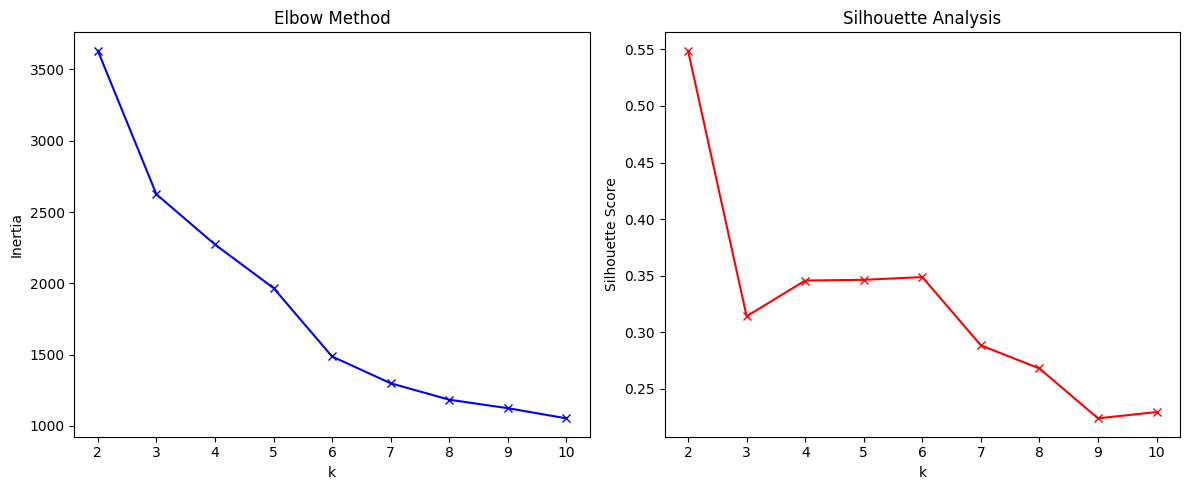

In [43]:
# Elbow-menetelmän visualisointi
#Luodaan kuvapohja kahdelle kuvaajalle
#Ensimmäinen kuvaaja: Inertian muutos k-arvojen suhteen
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(list(k_values), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

#Toinen kuvaaja: Silhouette-pisteiden muutos k-arvojen suhteen
plt.subplot(1,2,2)
plt.plot(list(k_values), silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [44]:
# Harjoitus/testausjakaumien vaikutuksen arviointi
from sklearn.model_selection import train_test_split        #Tuodaan train_test_split-funktio

split_ratios = [0.6, 0.7, 0.8, 0.9]                         #Määritetään testattavat jakaumasuhteet
results = []                                                #Luodaan tyhjä tulos-lista



In [45]:
# Eri jakaumien testaaminen
for ratio in split_ratios:                  #Käydään läpi jokainen jakaumasuhde
    # Jako harjoitus- ja testijoukkoon
    X_train, X_test = train_test_split(X_scaled, train_size=ratio, random_state=42)
    # Jakaa datan (X_scaled) harjoitus- ja testijoukkoon
    # train_size määrittää harjoitusjoukon koon suhteessa koko dataan
    # random_state varmistaa toistettavan satunnaisjaon
    
    # Suoritetaan k-means kahdella klusterilla
    kmeans = KMeans(n_clusters=2, random_state=42)
    # Luodaan KMeans-malli 2 klusterilla
    # random_state varmistaa samanlaiset klusterit jokaisella suorituskerralla
    kmeans.fit(X_train)
    # Sovitetaan malli harjoitusjoukkoon
    # Lasketaan klustereiden keskipisteet ja järjestetään datapisteet klustereihin
    
    
    # Tallennetaan tulokset (jakaumasuhde, joukon koko, inertia, silhouette-pisteet)
    results.append({
        'Split Ratio': ratio,                               # Käytetty jakaumasuhde
        'Training Set Size': X_train.shape[0],              # Harjoitusjoukon koko
        'Inertia': kmeans.inertia_,                         # Klustereiden sisäinen koheesio
        'Silhouette Score': silhouette_score(X_train, kmeans.labels_)       # Klustereiden erottelukyky
    })

# Tallennetaan jokaisen jakaumasuhteen tulokset results-listaan

In [46]:
# Tulosten näyttäminen
results_df = pd.DataFrame(results)
print(results_df)

   Split Ratio  Training Set Size      Inertia  Silhouette Score
0          0.6                299  1472.234915          0.322227
1          0.7                349  1910.750412          0.324529
2          0.8                399  2098.770851          0.329633
3          0.9                449  2704.884292          0.326883


Tulokset näyttävät k-means-klusteroinnin ominaisuuksista eri harjoitusjoukon koissa:

Split Ratio (Jakaumasuhde):
Tämä kertoo, kuinka suuri osa datasta käytetään "oppimiseen" (harjoitusjoukko) ja kuinka paljon jätetään testaukseen.

0.6 tarkoittaa, että 60 % datasta annetaan "koneen opiskeltavaksi" ja loput 40 % testataan.


Training Set Size (Harjoitusjoukon koko):
Tämä on niiden "oppimiseen" käytettyjen datapisteiden määrä.
Esimerkki:
Jos harjoitusjoukon koko on 299, kone opettelee 299 datapisteellä.
Jos koko on 449, se opettelee suuremmalla määrällä datapisteitä.


Inertia:
Tämä mittaa, kuinka tiiviisti datapisteet ovat ryhmittyneet omiin "ryhmiinsä" (klustereihin).
Esimerkki:
Pieni inertia-arvo (1472) tarkoittaa, että pisteet ovat suhteellisen lähellä toisiaan klustereissaan, mikä on hyvä.
Suuri arvo (2704) tarkoittaa, että klustereissa on enemmän hajontaa (pisteet ovat kauempana toisistaan), mikä voi olla huonompi.

Silhouette Score:
Tämä kertoo, kuinka hyvin klusterit on erotettu toisistaan.
Esimerkki:
Jos arvo on lähellä 1, klusterit ovat selvästi erillisiä.
Jos arvo on 0, klusterit sekoittuvat toisiinsa.
Tässä tapauksessa arvo on noin 0.3, mikä tarkoittaa, että klusterit ovat erottuneet toisistaan kohtuullisesti, mutta ei täydellisesti.



Tulkinta: Harjoitusjoukon koon kasvaessa inertia kasvaa, mutta klustereiden laatu (Silhouette Score) pysyy melko vakaana. Toisin sanoen mitä enemmän dataa käytetään harjoitteluun, sitä enemmän on muutoksia klusteroinnissa (tosin klusterointi muuttuvat vain vähän). Klustereiden laatu säilyy melko vakiona. Algoritmille ei ole merkitystä käytetäänkö 60% vai 90% datasta.